Text(0.5, 0, 'Sample Size')

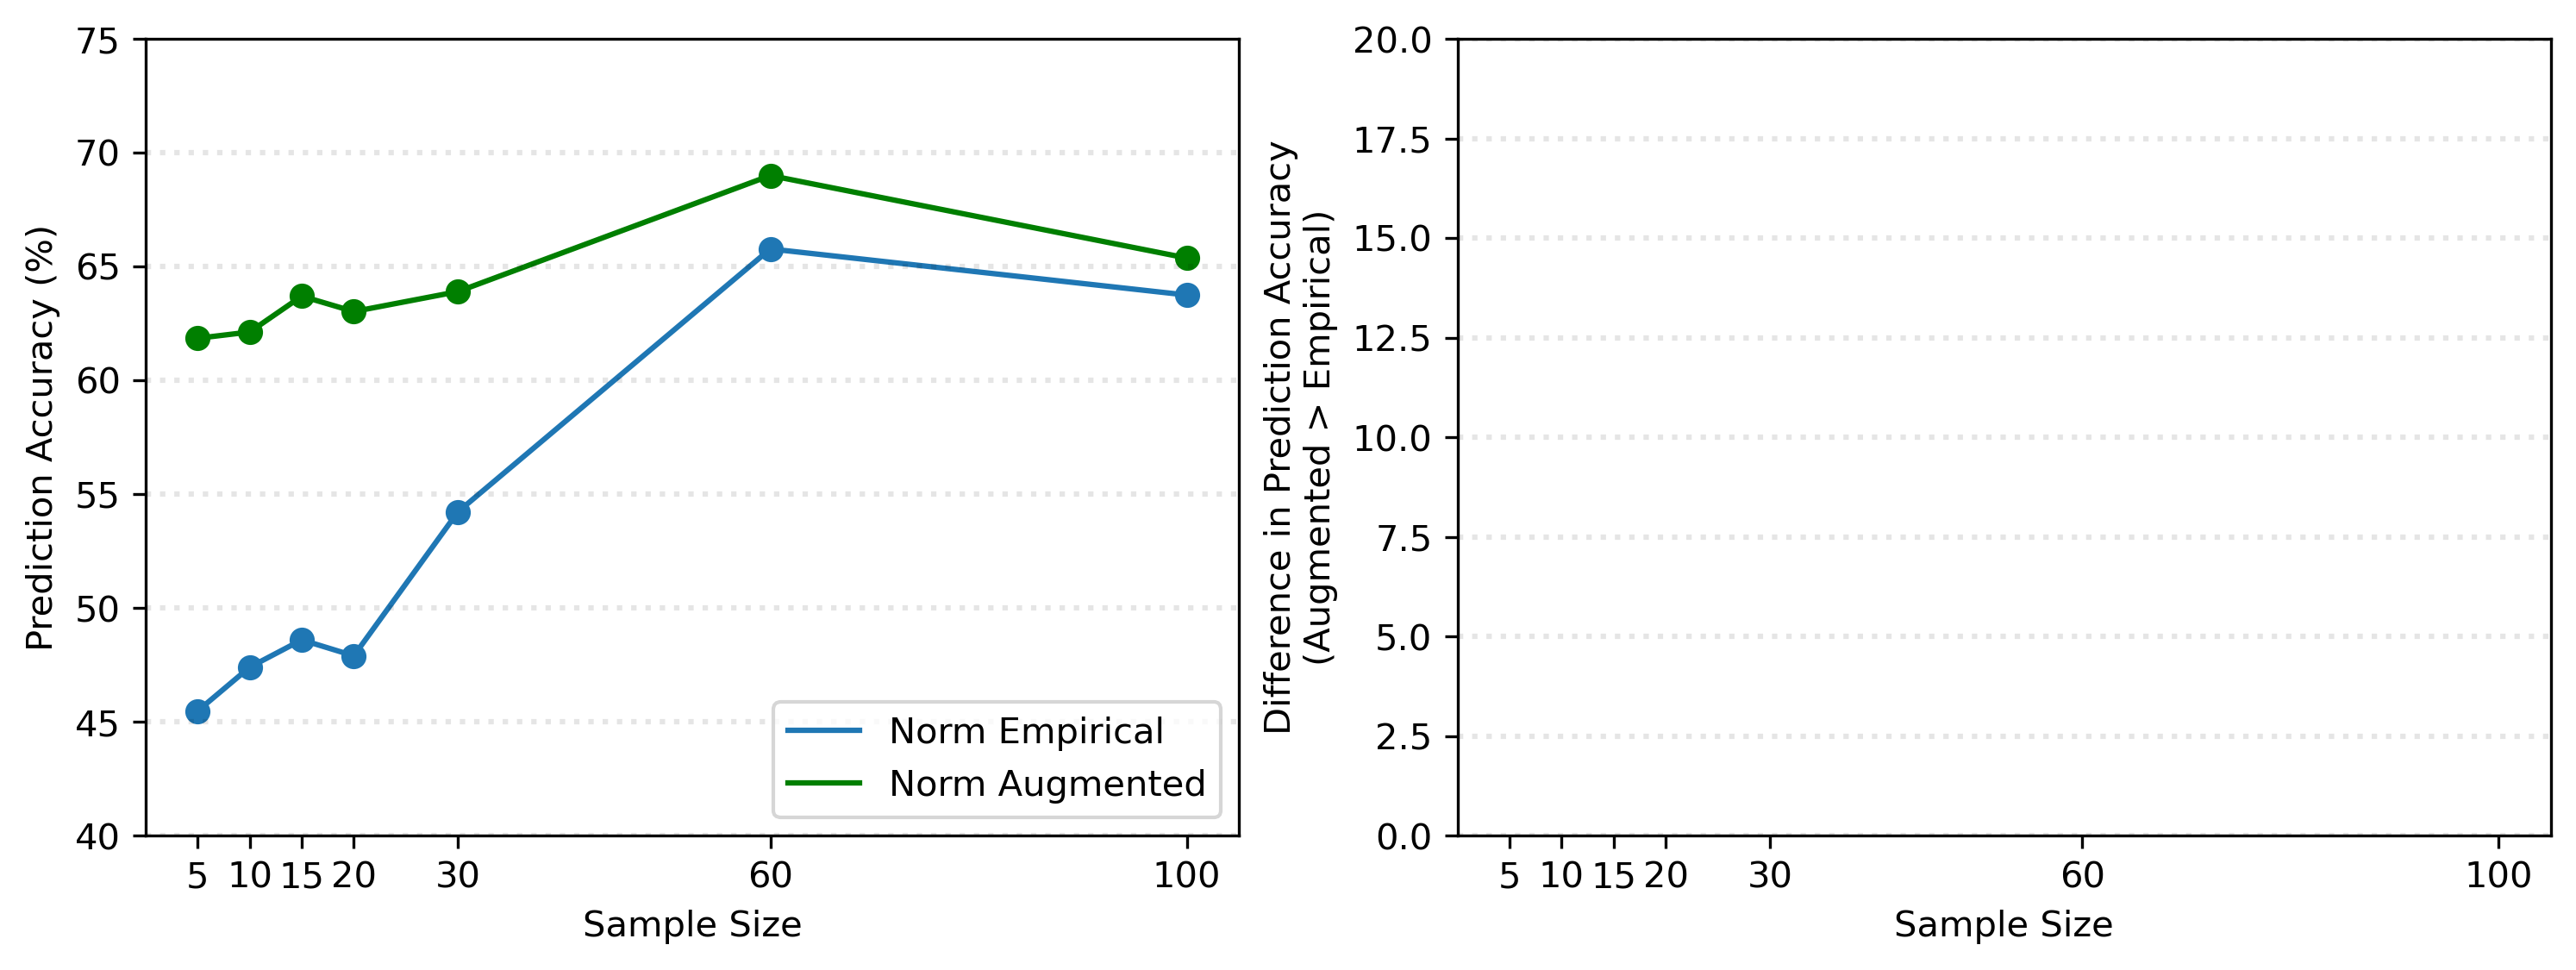

In [222]:
import numpy as np
import matplotlib.pyplot as plt

#xLabels = [5,10,15,20,30,40,50,60,80,100]
xLabels = [5,10,15,20,30,60,100]

def loadAndPlot(filename, plotColor, legendName):
    data = []
    with open(filename) as f:
        [data.append(line.split(',')[0:4]) for line in f.readlines()]
    data = np.asarray(data).astype(int)
    
    meanData = []
    for ss in xLabels:
        ssIndex = data[:,0] == ss
        meanData.append(np.mean(data[ssIndex,3]))
        
    if plotColor == np.nan:
        plt.plot(xLabels,meanData)
        plt.scatter(xLabels,meanData,label='_nolegend_')
    else:
        plt.plot(xLabels,meanData, color = plotColor)
        plt.scatter(xLabels,meanData,label='_nolegend_', color = plotColor)
        
    return legendName
'''    
nnDataDS = []
with open('empiricalPredictions_Runs_NoBaselineSmallSearch.csv') as f:
    [nnDataDS.append(line.split(',')[0:4]) for line in f.readlines()]
nnDataDS = np.asarray(nnDataDS).astype(int)

nnDataDSSyn_SynP100 = []
with open('Prediction Data/augmentedPredictions_SynP100.csv') as f:
    [nnDataDSSyn_SynP100.append(line.split(',')[0:4]) for line in f.readlines()]
nnDataDSSyn_SynP100 = np.asarray(nnDataDSSyn_SynP100).astype(int)
    
meanDataDS = []
for ss in xLabels:
    ssIndex = nnDataDS[:,0] == ss
    meanDataDS.append(np.mean(nnDataDS[ssIndex,3]))

meanDataDSSyn_SynP100 = []
for ss in xLabels:
    ssIndex = nnDataDSSyn_SynP100[:,0] == ss
    meanDataDSSyn_SynP100.append(np.mean(nnDataDSSyn_SynP100[ssIndex,3]))
    
#meanDiff = [np.nan]*len(meanDataDS)
meanDiff = []
for ss in range(len(meanDataDSSyn_SynP100)):
    meanDiff.append(meanDataDSSyn_SynP100[ss]-meanDataDS[ss])
'''
plt.figure(figsize=(12, 4), dpi=300)
ax1 = plt.subplot(1,2,1)
#for i in range(len(meanDataDSSyn_SynP100)):
#    plt.plot([xLabels[i],xLabels[i]], [meanDataDS[i],meanDataDSSyn_SynP100[i]], linestyle="--", color="grey", alpha=.3, label='_nolegend_')
#    ax1.annotate(str(round(meanDiff[i]))+'%', (xLabels[i]-3.5, np.mean([meanDataDS[i],meanDataDSSyn_SynP100[i]])-1),  ha='left', rotation=90, color='grey',alpha=.3)

#for ss in xLabels:
#    ssIndex = nnDataDSSyn_SynP100[:,0] == ss
#    for runAccuracy in nnDataDSSyn_SynP100[ssIndex,3]:
#        plt.scatter([ss],[runAccuracy], color='orange',alpha=.1,facecolors='none')

#for ss in xLabels:
#    ssIndex = nnDataDS[:,0] == ss
#    for runAccuracy in nnDataDS[ssIndex,3]:
#        plt.scatter([ss],[runAccuracy], color='blue',alpha=.1,facecolors='none')

#for i, txt in enumerate(meanDiff):
#    ax1.annotate(str(round(txt))+'%', (xLabels[i]-3, meanDiff[i]+1))

legendNames = []
legendNames.append(loadAndPlot('Prediction Data/empiricalPredictions.csv','#1F77B4','Norm Empirical'))
legendNames.append(loadAndPlot('Prediction Data/augmentedPredictions_SynP100.csv','#007F00','Norm Augmented'))
#legendNames.append(loadAndPlot('empiricalPredictions_SVM_Runs.csv','#1F77B4','SVM: Empirical'))
#legendNames.append(loadAndPlot('augmentedPredictions_SVM_SynP050_Runs.csv','#1F77F4','SVM: Augmented'))
#legendNames.append(loadAndPlot('empiricalPredictions_LR_Runs.csv','#FF7F0E','Logistic Regression: Empirical'))
#legendNames.append(loadAndPlot('augmentedPredictions_LR_SynP050_Runs.csv','#FF7FFE','Logistic Regression: Augmented'))
#legendNames.append(loadAndPlot('empiricalPredictions_NN_Runs_SmallSearch.csv','#007F00','Neural Network: Empirical SmallSearch'))
#legendNames.append(loadAndPlot('augmentedPredictions_NN_SynP050_Runs_SmallSearch.csv','#00FF00','Neural Network: Augmented SmallSearch'))
#legendNames.append(loadAndPlot('empiricalPredictions_NN_Runs.csv','#1F77B4','Neural Network: Empirical'))
#legendNames.append(loadAndPlot('augmentedPredictions_NN_SynP050_Runs.csv','#FF7F0E','Neural Network: Augmented'))

#loadAndPlot('Prediction Data/augmentedPredictions_SynP100.csv','#FF7F0E')
axisLevels = np.arange(40,75,5)
for y in axisLevels:
    plt.axhline(y=y, color='k', linestyle=':', alpha=.1)
plt.ylim(40,75)
plt.xlim(0,105)
plt.xticks(xLabels)
plt.legend(legendNames, loc='lower right')
plt.ylabel('Prediction Accuracy (%)')
plt.xlabel('Sample Size')

ax = plt.subplot(1,2,2)
#plt.plot(xLabels[0:len(meanDiff)],meanDiff, alpha=.5)
#plt.scatter(xLabels[0:len(meanDiff)],meanDiff,label='_nolegend_')
axisLevels = np.arange(0,21,2.5)
for y in axisLevels:
    plt.axhline(y=y, color='k', linestyle=':', alpha=.1)
plt.ylim(0,20)
plt.xlim(0,105)
plt.yticks(axisLevels)
plt.xticks(xLabels)
plt.ylabel('Difference in Prediction Accuracy\n(Augmented > Empirical)')
plt.xlabel('Sample Size')

#fig = plt.gcf()
#fig.set_size_inches(6, 6)
#fig.savefig('Proposal Figure 3.png', dpi=600)
